In [5]:
from platform import python_version

print(python_version())

3.10.8


In [10]:
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, load_iris

In [89]:
d = load_wine()

d.data.shape

(178, 13)

In [90]:

data = load_iris()

df = pd.DataFrame(data.data, columns=data.feature_names)
df['class'] = data.target

In [91]:
feature_means_1 = df.groupby('class').mean().T

In [92]:
feature_means_1.head()

class,0,1,2
sepal length (cm),5.006,5.936,6.588
sepal width (cm),3.428,2.770,2.974
petal length (cm),1.462,4.260,5.552
petal width (cm),0.246,1.326,2.026


In [93]:
with_in_class_s_m = np.zeros((4, 4))

for c, rows in df.groupby('class'):
    rows = rows.drop(['class'], axis=1)
    
s = np.zeros((4, 4))

for index, row in rows.iterrows():
    x, mc = row.values.reshape(4, 1), feature_means_1[c].values.reshape(4, 1)
        
    s += (x - mc).dot((x - mc).T)
        
    with_in_class_s_m += s

In [94]:
feature_name2 = df.iloc[::, :-1].mean()

between_class_m = np.zeros((4, 4))

for c in feature_means_1:
    n = len(df.loc[df['class'] == c].index)
    mc, m = feature_means_1[c].values.reshape(4, 1), feature_name2.values.reshape(4, 1)


between_class_m += n * (mc - m).dot((mc - m).T)

In [95]:
between_class_m.shape

(4, 4)

In [96]:
eigen_values, eigen_vectors =  np.linalg.eig(np.linalg.inv(with_in_class_s_m).dot(between_class_m))

In [97]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]

eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)

for pair in eigen_pairs:
    print(pair[0])

1.1326262452293236
4.7160889029751517e-17
4.7160889029751517e-17
0.0


In [104]:
sum_of_eigen_values = np.sum(eigen_values)

for i, pair in enumerate(eigen_pairs):
    print(f' Eigen Vecorts {i}: {(pair[0] / sum_of_eigen_values).real}')

 Eigen Vecorts 0: 1.0
 Eigen Vecorts 1: 4.163852747399723e-17
 Eigen Vecorts 2: 4.163852747399723e-17
 Eigen Vecorts 3: 0.0


In [121]:
W_matrix = np.hstack((eigen_pairs[0][1].reshape(4, 1), eigen_pairs[1][1].reshape(4, 1))).real

W_matrix

array([[-0.3532, -0.8824],
       [-0.4008, -0.0159],
       [ 0.5996,  0.3094],
       [ 0.5959,  0.1218]])

In [123]:
X_lda = np.array(X.dot(W_matrix))

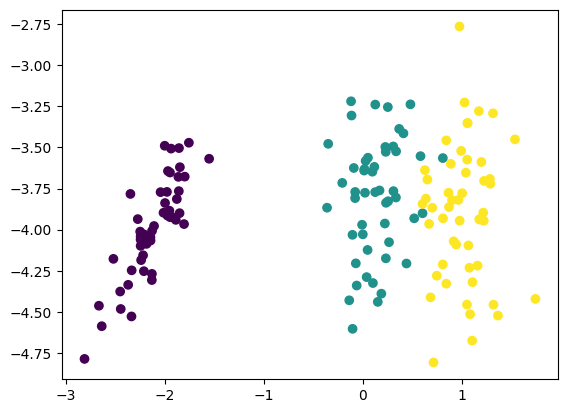

In [129]:
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=df['class'])
plt.show()

--------------------------

In [72]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
np.set_printoptions(precision=4)

In [10]:
np.random.seed(1)
np.random.randn(10, (10))

array([[ 1.6243, -0.6118, -0.5282, -1.073 ,  0.8654, -2.3015,  1.7448,
        -0.7612,  0.319 , -0.2494],
       [ 1.4621, -2.0601, -0.3224, -0.3841,  1.1338, -1.0999, -0.1724,
        -0.8779,  0.0422,  0.5828],
       [-1.1006,  1.1447,  0.9016,  0.5025,  0.9009, -0.6837, -0.1229,
        -0.9358, -0.2679,  0.5304],
       [-0.6917, -0.3968, -0.6872, -0.8452, -0.6712, -0.0127, -1.1173,
         0.2344,  1.6598,  0.742 ],
       [-0.1918, -0.8876, -0.7472,  1.6925,  0.0508, -0.637 ,  0.1909,
         2.1003,  0.1202,  0.6172],
       [ 0.3002, -0.3522, -1.1425, -0.3493, -0.2089,  0.5866,  0.839 ,
         0.9311,  0.2856,  0.8851],
       [-0.7544,  1.2529,  0.5129, -0.2981,  0.4885, -0.0756,  1.1316,
         1.5198,  2.1856, -1.3965],
       [-1.4441, -0.5045,  0.16  ,  0.8762,  0.3156, -2.0222, -0.3062,
         0.828 ,  0.2301,  0.762 ],
       [-0.2223, -0.2008,  0.1866,  0.4101,  0.1983,  0.119 , -0.6707,
         0.3776,  0.1218,  1.1295],
       [ 1.1989,  0.1852, -0.3753, -0

-----------

In [23]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

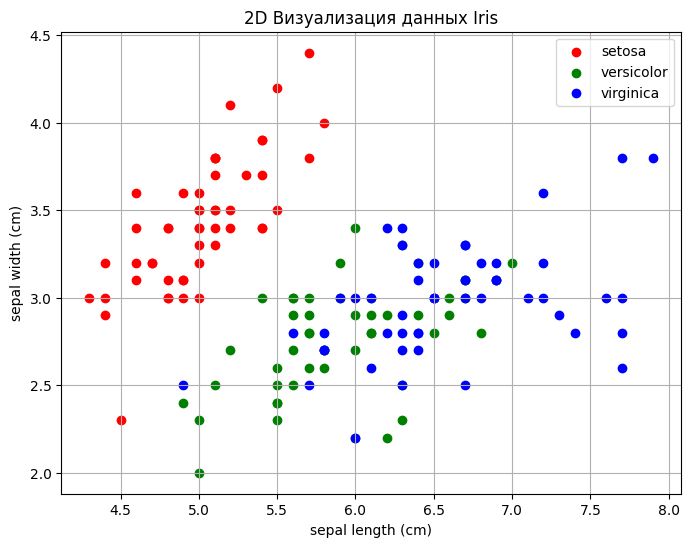

In [22]:

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names


df = pd.DataFrame(X, columns=feature_names)
df['target'] = y


plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'green', 'blue'], target_names):
    plt.scatter(
        df[df['target'] == target][feature_names[0]],
        df[df['target'] == target][feature_names[1]],
        label=label, color=color
    )

plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title("2D Визуализация данных Iris")
plt.legend()
plt.grid(True)
plt.show()


------

In [8]:
import numpy as np
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [5]:
df = pd.DataFrame(datasets.load_iris().data, columns=datasets.load_iris().feature_names)
df['target'] = datasets.load_iris().target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
x = df.iloc[::, :-1]
y = df.iloc[::, -1]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [10]:
model_d = LinearDiscriminantAnalysis(n_components=2)
model_d.fit(x_train, y_train)

LinearDiscriminantAnalysis(n_components=2)

In [18]:
predict = model_d.predict(x_test)
predict

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1])

In [15]:
print('score test; ', model_d.score(x_test, y_test))
print('score train; ', model_d.score(x_train, y_train))
print('score true data: ', model_d.score(x, y))

score test;  1.0
score train;  0.9714285714285714
score true data:  0.98


-----------------

In [42]:
x = np.array(df.iloc[::, :-1])
y = np.array(df.iloc[::, -1])

In [29]:
classes = np.unique(y)

# mean_vectors = df.groupby('target').mean().T

# mean_vectors = np.mean(mean_vectors, axis=1)
# mean_vectors

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [52]:
###### calculate mean values for each classes and overall means:

mean_vectors2 = []

for c in classes:
    
    mean_vectors2.append(np.mean(x[y == c], axis=0))
    
overall_mean = np.mean(x, axis=0)


#### Calculate the intra-class scatter matrix:

s_w = np.zeros((x.shape[1], x.shape[1]))

for c, mv in zip(classes, mean_vectors2):
    
    class_scatter = np.zeros((x.shape[1], x.shape[1]))
    
    for row in x[y == c]:
        
        row, mv = row.reshape(-1, 1), mv.reshape(-1, 1)
        class_scatter += (row - mv).dot((row - mv).T)
        
    s_w += class_scatter

    
#### Calculate the between-class scatter matrix:

s_b = np.zeros((x.shape[1], x.shape[1]))

for c, mv in zip(classes, mean_vectors2):
    
    n_c = x[y == c].shape[0]
    
    mv, overall_mean = mv.reshape(-1, 1), overall_mean.reshape(-1, 1)
    
    s_b += n_c * (mv - overall_mean).dot((mv - overall_mean).T)
    
    
    
###### We solve the problem of generalized eigenfactorization: S_W^-1 S_B:

eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(s_w).dot(s_b))


###### Sort eigenvalues and select top components:

eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(len(eigen_values))]
eigen_pairs = sorted(eigen_pairs, key=lambda k: k[0], reverse=True)



###### We collect top components (for example, the first 2 for visualization)

W = np.hstack((eigen_pairs[0][1].reshape(-1, 1), eigen_pairs[1][1].reshape(-1, 1)))


##### Transform data

x_lda = x.dot(W)

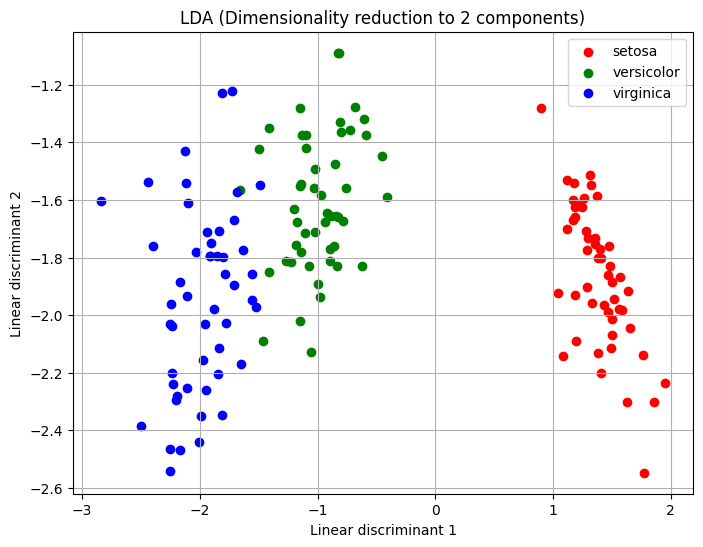

In [55]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
for c, label, color in zip(classes, datasets.load_iris().target_names, ['red', 'green', 'blue']):
    plt.scatter(x_lda[y == c, 0], x_lda[y == c, 1], label=label, color=color)
    
plt.title("LDA (Dimensionality reduction to 2 components)")
plt.xlabel("Linear discriminant 1")
plt.ylabel("Linear discriminant 2")
plt.legend()
plt.grid()
plt.show()

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

crp = np.array([40, 11.1, 30.0, 21.4, 10.7, 3.4, 42.0, 31.1, 50.0, 60.4, 45.7, 17.3])
temp = np.array([36.0, 37.2, 36.5, 39.4, 39.6, 40.7, 37.6, 42.2, 38.5, 39.4, 38.6, 42.7])
inf = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])


Scores = 0.11 * crp + 0.70 * temp 

Scores

df = pd.DataFrame({'crp': crp, 'temp': temp, 'class': inf})
df.head()

,crp,temp,class
0,40.0,36.0,0
1,11.1,37.2,0
2,30.0,36.5,0
3,21.4,39.4,0
4,10.7,39.6,0


In [69]:
total = df.groupby('class').var()

mean_var_bettwen_crp = (total.iloc[::, 0][0] + total.iloc[::, 0][1]) / 2

In [82]:
mean_var_bettwen_temp = (total.iloc[::, 1][0] + total.iloc[::, 1][1]) / 2

In [84]:
total

,crp,temp
class,,
0,188.258667,3.674667
1,228.021667,4.458667


In [70]:
crp_ = crp.mean()
temp_ = temp.mean()

In [85]:
z_crp = (crp - crp_) / mean_var_bettwen**0.5
z_temp = (temp - temp_) / mean_var_bettwen_temp**0.5

In [86]:
z_temp

array([-1.5041836 , -0.90912196, -1.25624125,  0.18182439,  0.28100133,
        0.82647451, -0.71076808,  1.57030156, -0.26447184,  0.18182439,
       -0.21488337,  1.81824391])

In [65]:
cent_scores = 0.11 * (crp - crp_) + 0.70 * (temp - temp_)

cent_scores

array([-1.05175, -3.39075, -1.80175, -0.71775, -1.75475, -1.78775,
        0.28825,  2.30925,  1.79825,  3.57225,  1.39525,  1.14125])

In [66]:
z1 = (crp - crp_) / crp.std()

z2 = (temp - temp_) / temp.std()

In [67]:
LDA = 0.79 * z1 + 0.61 * z2

LDA

array([-0.47041466, -1.44495604, -0.78186268, -0.29906376, -0.73412116,
       -0.73810837,  0.10851266,  1.00136724,  0.75274698,  1.50819737,
        0.58387531,  0.51382711])

In [73]:
PCA = 0.71 * z1 + 0.71 * z2

PCA[inf == 0]

array([-0.66725093, -1.44638991, -0.90686213, -0.23922711, -0.61410896,
       -0.52903729])

In [74]:
LDA[inf == 1]

array([0.10851266, 1.00136724, 0.75274698, 1.50819737, 0.58387531,
       0.51382711])

In [79]:
np.arange(-2, 2)

array([-2, -1,  0,  1])

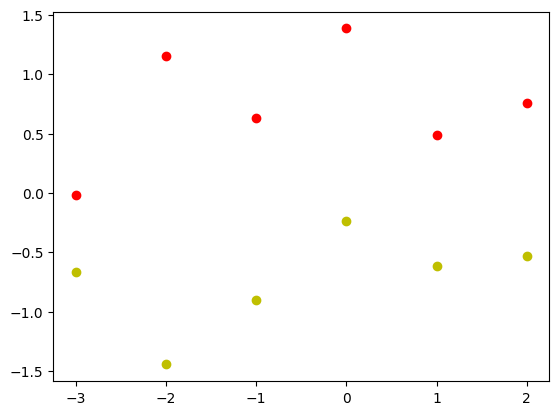

In [82]:
plt.scatter(np.arange(-3, 3), PCA[inf == 0], c='y')
plt.scatter(np.arange(-3, 3), PCA[inf == 1], c='r')
plt.show()

---------------

In [50]:
import numpy as np
from sklearn.datasets import make_classification

# Генерируем данные (2 признака, 3 класса)
X, y = make_classification(n_samples=150, n_features=2, n_classes=3, 
                           n_informative=2, n_redundant=0, random_state=42, n_clusters_per_class=1, n_repeated=0)

# Вычисляем средние значения каждого класса
classes = np.unique(y)
mean_vectors = {c: np.mean(X[y == c], axis=0) for c in classes}

# Вычисляем S_W
S_W = np.zeros((2, 2))  # Матрица 2x2, так как у нас два признака
for c in classes:
    class_scatter = np.zeros((2, 2))  # Матрица разброса для одного класса
    for row in X[y == c]:  # Для всех точек в классе
        row = row.reshape(2, 1)  # Вектор-столбец
        mean_vec = mean_vectors[c].reshape(2, 1)  # Среднее класса в виде столбца
        class_scatter += (row - mean_vec).dot((row - mean_vec).T)  # Вычисляем (x - mu)(x - mu)^T
    S_W += class_scatter  # Добавляем матрицу разброса класса к общей S_W

print("Матрица разброса внутри классов (S_W):\n", S_W)

Матрица разброса внутри классов (S_W):
 [[107.91336554 -10.20015486]
 [-10.20015486  78.08963274]]


In [21]:
import numpy as np

# Допустим, у нас есть 3 класса с такими средними значениями:
mean_vectors = {
    0: np.array([2.0, 3.0]),  # Среднее для класса 0
    1: np.array([5.0, 6.0]),  # Среднее для класса 1
    2: np.array([7.0, 8.0])   # Среднее для класса 2
}

# Общее среднее (вектор)
overall_mean = np.mean(list(mean_vectors.values()), axis=0)

# Количество точек в каждом классе (например, 50 в каждом классе)
class_counts = {0: 50, 1: 50, 2: 50}

# Вычисляем S_B
S_B = np.zeros((2, 2))  # Матрица 2x2, потому что у нас два признака (x1 и x2)
for c, mean_vec in mean_vectors.items():
    mean_vec = mean_vec.reshape(2, 1)  # Делаем вектор-столбец
    overall_mean = overall_mean.reshape(2, 1)
    S_B += class_counts[c] * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)

print("Матрица разброса между классами (S_B):\n", S_B)


Матрица разброса между классами (S_B):
 [[633.33333333 633.33333333]
 [633.33333333 633.33333333]]


--------------

In [39]:
classes = np.unique(y)
mean_vectors = {c: np.mean(X[y == c], axis=0) for c in classes}

## Calculate the total covariance matrix

S_W = np.cov(X.T)

## Invert the covariance matrix

S_W_inv = np.linalg.inv(S_W)

## Calculate the a priori probabilities of classes

priors = {c: np.mean(y == c) for c in classes}

## Fuction to predict class

def lda_predict(x_new):
    scores = []
    for c in classes:
        # Discriminant function (without logarithm of probability for simplicity)
        delta = x_new @ S_W_inv @ mean_vectors[c] - 0.5 * mean_vectors[c] @ S_W_inv @ mean_vectors[c] + np.log(priors[c])
        scores.append(delta)
    
    return np.argmax(scores, axis=0) ## We select the class with the maximum value of the discriminant function


## make predict

y_pred = np.array([lda_predict(x) for x in X])

## estimates quality

accuracy = np.mean(y_pred == y)

print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


-----

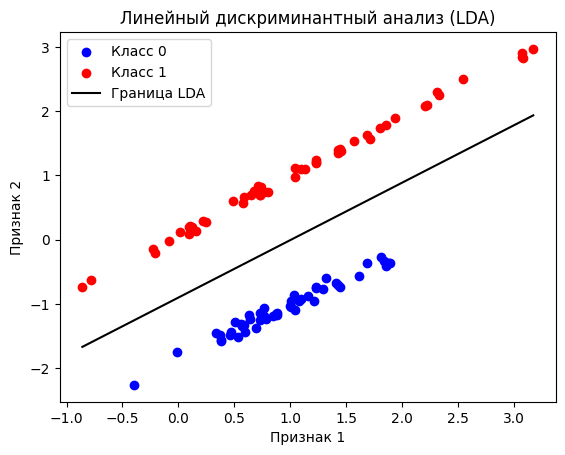

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# 1️⃣ Генерируем данные
X, y = make_classification(n_samples=100, n_features=2,
                           n_classes=2, n_informative=2,
                           random_state=42, n_redundant=0,
                           n_repeated=0, n_clusters_per_class=1)

# 2️⃣ Находим средние классов
mu_1 = np.mean(X[y == 0], axis=0)
mu_2 = np.mean(X[y == 1], axis=0)

# 3️⃣ Вычисляем S_W
S_W = np.cov(X[y == 0].T) + np.cov(X[y == 1].T)

# 4️⃣ Находим W
W = np.linalg.inv(S_W) @ (mu_2 - mu_1)

# 5️⃣ Вычисляем b
b = -0.5 * (mu_1 + mu_2).T @ W

# 6️⃣ Визуализируем
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label="Класс 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label="Класс 1")

# 7️⃣ Линия разделения
x_line = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_line = (-W[0] * x_line - b) / W[1]
plt.plot(x_line, y_line, color='black', label="Граница LDA")

plt.legend()
plt.xlabel("Признак 1")
plt.ylabel("Признак 2")
plt.title("Линейный дискриминантный анализ (LDA)")
plt.show()


----------

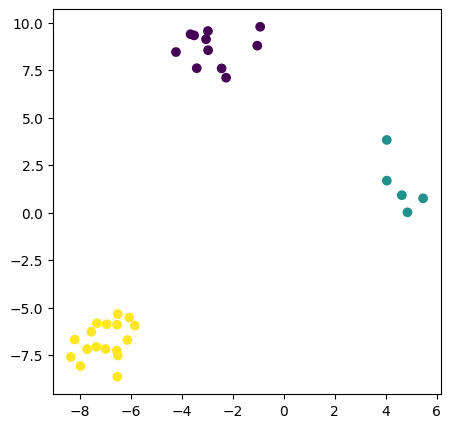

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification, make_blobs
import scipy as sc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions

np.random.seed(1)
x, y = make_blobs(n_samples=[11, 5, 17], n_features=2, random_state=42)

df = pd.DataFrame(x, columns=['feature_0', 'feature_0'])
df['class'] = y

plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

In [42]:
df.select_dtypes(include=['object']).columns

Index([], dtype='object')

In [1]:
class LDA:
    
    def __init__(self, n_components=None):
        
        self.n_components = n_components
        
    def fit(self, X, y):
        
        n_samples, n_features = X.shape
        classes, cls_couts = np.unique(y, return_counts=True)
        priors = cls_couts / n_samples
        
        X_cls_mean = np.array([X[y == cls].mean(axis=0) for cls in classes])
        between_cls_deviation = X_cls_mean - X.mean(axis=0)
        with_cls_deviation = X - X_cls_mean[y]
        
        Sb = priors * between_cls_deviation.T @ between_cls_deviation
        Sw = with_cls_deviation.T @ with_cls_deviation / n_samples
        evals, evecs = np.linalg.eig(Sb, Sw)
        
        self.dvecs = evecs[:, np.argsort(evals)[::-1]]
        
        self.weights = X_cls_mean @ self.dvecs @ self.dvecs.T
        self.bias = np.log(priors) - 0.5 * np.diag(X_cls_mean @ self.weights.T)
        
        if self.n_components is None:
            self.n_components = min(classes.size - 1, n_features)
            
    def transform(self, X):
        return X @ self.dvecs[:, : self.n_components]
    
    
    def predict(self, X_test):
        scores = X_test @ self.weights.T + self.bias
        
        return np.argmax(scores, axis=1)
        